# Машинное обучение (ДВФУ)

## Домашнее задание 4 (10 баллов)

### Дедлайн: 4 апреля, 23:59

Домашнее задание состоит из трёх частей. Каждое задание в каждой части оценивается в 1 балл, кроме единственного задания третьей части – оно оценивается в 1 балл + 1 бонусный балл (то есть максимально за домашнее задание можно получить 11 баллов; баллы выше 10 так и пойдут в формулы оценок). 

### Про задание

1. Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

2. Гуглите как можно больше! Если у вас появляется какой-то вопрос про использование метода numpy, скорее всего, на него уже есть ответ в Google – главное, правильно задать вопрос! Использование поисковика резко поощряется. 

3. Плагиат не допускается (нельзя просто так списать у друга). **НО:** можно использовать **любую** информацию из открытых Интернет-источников с указанием ссылки на них. Правила оформления из ДЗ 1 сохраняются.

4. Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Часть 1: Основы построения решающие дерева (3 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`. 

**Задание 1:** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 – метку $k_2$. Посчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [3]:
import math
#https://pythonim.ru/chisla/funktsiya-log-v-python
# https://pythobyte.com/decision-trees-9e0c7290/
H= -8/10 * math.log (8/10) - 2/10 * math.log ( 2/10) 
print(round(H,2))

0.5


**Задание 2:** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_k p_k(1-p_k)
$$

 Ответ округлите до двух знаков после запятой.

In [2]:
k = 10
k1 = 8
k2 = 2
HRm = k1/k*(1-k1/k) + k2/k*(1-k2/k)
Hl = k1/k1*(1-k1/k1)
Hr = k2/k2*(1-k2/k2)
Q = HRm - np.abs(k1/k)*Hl - np.abs(k2/k)*Hr
print(round(Q,2))

0.32


**Задание 3:** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [6]:
y = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
np.mean(y)

40.6

## Часть 2: Дереьвя, бэггинг и случайный лес (6 баллов)

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [14]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [84]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

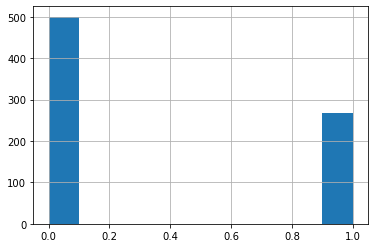

In [85]:
data['Outcome'].hist()
plt.show()

**Задание 4:** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [109]:
y = data.Outcome
X = data.drop('Outcome', axis = 1)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 15)
X_train.shape, x_test.shape, Y_train.shape, y_test.shape, x_train.shape, x_valid.shape

((537, 8), (231, 8), (537,), (231,), (375, 8), (162, 8))

**Задание 5:** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке. 


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [123]:
f = 0
for n in range(1,10):
    for m in range(1,10):
        d = DecisionTreeClassifier(max_depth = n, min_samples_leaf = m, random_state = 15)
        d.fit(x_train, y_train)
        y_predict = d.predict(x_valid)
        f = f1_score(y_valid, y_predict)
        if f1 > f:
            f,md,msl = f1,n,m
print('f1-мера = ', round(f,2), ',max_depth =', md,',min_samples_leaf =', msl)

f1-мера =  0.66 ,max_depth = 9 ,min_samples_leaf = 8


In [95]:
tree =  DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 8,  random_state = 15).fit(X_train, Y_train)
y_predict = tree.predict(x_test)
y_roc = tree.predict_proba(x_test)[:, 1]

print ('accuracy =', accuracy_score(y_test, y_predict),'\n','precision =', 
       precision_score(y_test, y_predict),'\n', 'recall = ', 
       recall_score(y_test, y_predict),'\n','auc_roc = ', roc_auc_score(y_test, y_roc))

accuracy = 0.7142857142857143 
 precision = 0.5316455696202531 
 recall =  0.5915492957746479 
 auc_roc =  0.7153609154929577


**Задание 6:** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [96]:
clf = BaggingClassifier(n_estimators= 50, random_state = 15).fit(X_train, Y_train)
y_predict = clf.predict(x_test)
y_roc = clf.predict_proba(x_test)[:, 1]

print ('accuracy =', accuracy_score(y_test, y_predict),'\n','precision =', 
       precision_score(y_test, y_predict),'\n', 'recall = ', 
       recall_score(y_test, y_predict),'\n','auc_roc = ', roc_auc_score(y_test, y_roc))

accuracy = 0.7662337662337663 
 precision = 0.6133333333333333 
 recall =  0.647887323943662 
 auc_roc =  0.7999999999999999


**Задание 7:** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации. 
3. Выберите ту пару значений, которая даёт наилучшее среднее качество. 

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [121]:
#https://ichi.pro/ru/obucite-regressionnuu-model-s-pomos-u-dereva-resenij-123150337752257
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

model = RandomForestClassifier(n_estimators = 50, random_state = 15)
ftwo_scorer = make_scorer(f1_score)
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(2,3)},
                  cv = 5,
                  n_jobs = 1,
                  scoring = ftwo_scorer)

gs.fit(X_train, Y_train)

print(gs.best_params_)
print(round(gs.best_score_,2))

{'max_depth': 7, 'min_samples_split': 2}
0.67


In [119]:
random = RandomForestClassifier(n_estimators = 50, max_depth = 7, min_samples_split = 2, 
                                random_state= 15).fit(X_train, Y_train)
y_predict = random.predict(x_test)
y_roc = random.predict_proba(x_test)[:, 1]

print ('accuracy =', accuracy_score(y_test, y_predict),'\n','precision =', 
       precision_score(y_test, y_predict),'\n', 'recall = ', 
       recall_score(y_test, y_predict),'\n','auc_roc = ', roc_auc_score(y_test, y_roc))

# лучше всего себя показала модель бэггинг, т.к. значения метрик в целом выше, чем у модели случайного леса и модели дерева решений 

accuracy = 0.7575757575757576 
 precision = 0.6056338028169014 
 recall =  0.6056338028169014 
 auc_roc =  0.7995598591549297


**Комментарий:** в заданиях 5 и 7 приведены две популярные стратегии подбора гиперпараметров: (1) на отдельной валидационной выборке и (2) на кросс-валидации по обучающей выборке.

**Задание 8:** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

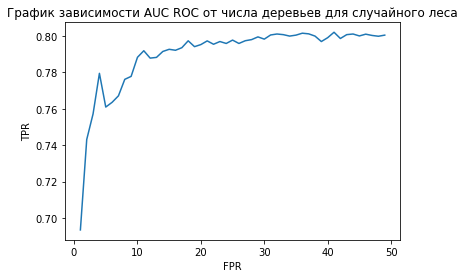

In [118]:
from sklearn.metrics import roc_curve
n_estimators = range (1, 50)
AUC_ROC = [] 
for n in n_estimators:
    random = RandomForestClassifier(n_estimators = n, max_depth = 7, 
                                min_samples_split = 2, random_state= 15).fit(X_train, Y_train)
    random_pr_roc = random.predict_proba(x_test)[:, 1]
    auc_roc = roc_auc_score(y_test, random_pr_roc)  
    AUC_ROC.append(auc_roc)

plt.plot(n_estimators, AUC_ROC)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('График зависимости AUC ROC от числа деревьев для случайного леса')
plt.show()
# До 5 количество дерьвьев увеличивает качество модели, затем происходит падение и потом более плавный рост

**Задание 9:** Для лучшей модели случайного леса из задания 7 посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета? Приведите возможное объяснение.

<BarContainer object of 8 artists>

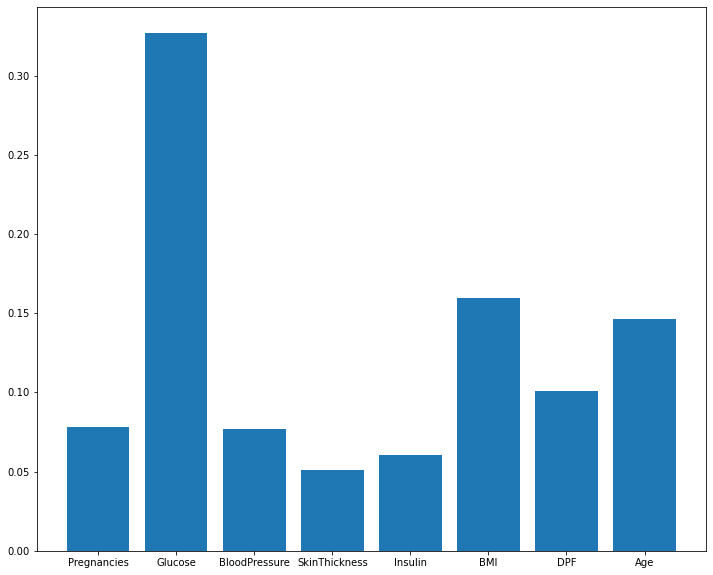

In [122]:
random = RandomForestClassifier(n_estimators = 50, max_depth = 7, min_samples_split = 2, random_state = 15).fit(X_train, Y_train)
x = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DPF', 'Age']

plt.figure(figsize = (12, 10))
plt.bar(x, random.feature_importances_)
# Самым важным оказался уровень глюкозы, что логично т.к. диабет - заболевание, связанное с резистентностью к глюкозе

## Часть 3: Творческая часть (1 балл + 1 бонусный балл)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга (`XGboost`, `catboost`, `LightGBM`). 1 балл ставится за преодоление порога `roc_auc_score` **0.72** и ещё 1 бонусный балл за преодоление порога **0.74** на выборке `test` ниже.

In [81]:
train = pd.read_csv('https://raw.githubusercontent.com/V-Marco/MO_dvfu_2022/main/homework_4/fd_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/V-Marco/MO_dvfu_2022/main/homework_4/fd_test.csv')

In [82]:
train.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,2,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
3,3,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
4,4,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [83]:
# Пример

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

/Users/vladislav/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6948437381275572